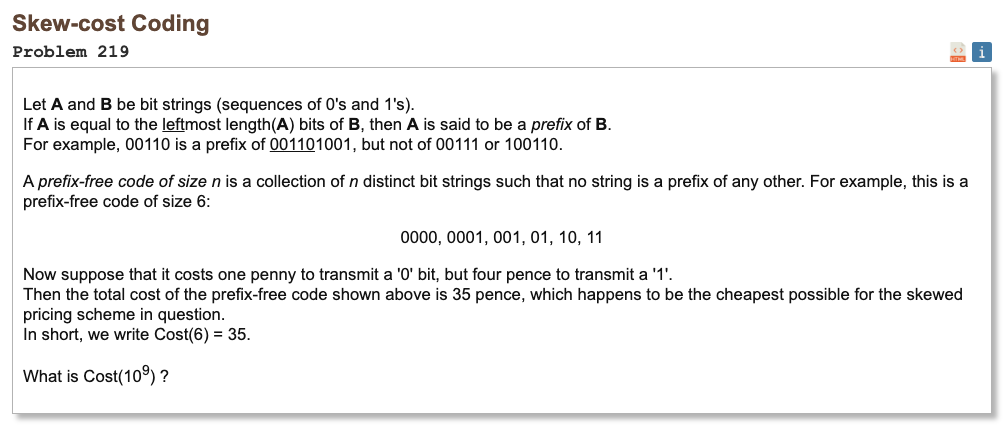

## Initial approach

* model a prefix free code as leaves of a binary tree where going left adds cost 1 and going right adds cost 4
* start with one leaf at the root with cost 0
* each time you expand a leaf of cost c into its two children, the number of leaves increases by 1
* that expansion changes the total leaf cost by (c+1)+(c+4)-c which is c+5
* to minimize the final total, you always expand the currently cheapest leaf, this matches visiting tree nodes in increasing path cost
* the multiset of node costs by exact cost d is the coefficient sequence of 1/(1 - x - x^4), so counts follow f(d)=f(d-1)+f(d-4)
* for n leaves you do k=n-1 expansions, then total cost is 5k plus the sum of the first k node costs in increasing cost order

In [1]:
def skew_cost(n: int) -> int:
    k = n - 1
    if k <= 0:
        return 0

    max_d = 500
    f = [0] * max_d
    f[0] = 1
    for d in range(1, max_d):
        f[d] = f[d - 1] + (f[d - 4] if d >= 4 else 0)

    cum = 0
    s = 0
    for d in range(max_d):
        if cum + f[d] >= k:
            need = k - cum
            s += d * need
            break
        cum += f[d]
        s += d * f[d]

    return 5 * k + s

In [2]:
%%time
result = skew_cost(10**9)
print("Result:", result)

Result: 64564225042
CPU times: user 487 μs, sys: 23 μs, total: 510 μs
Wall time: 503 μs
